<a href="https://colab.research.google.com/github/ManojKumarTiwari/Tensorflow2AndKeras/blob/master/2_Regression_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Contents
- Overview
  - Dataset
  - What you'll learn

# Overview
- We will implement a regression MLP

# Dataset
- sklearn.fetch_california_housing()

# What you'll learn
- Sequential Model
- Shallow Neural Network and Deep Neural Network

# Imports

In [1]:
# !pip install --upgrade tensorflow

     |████████████████████████████████| 421.8MB 37kB/s 
     |████████████████████████████████| 450kB 44.8MB/s 
     |████████████████████████████████| 3.9MB 49.9MB/s 
ERROR: tensorflow-federated 0.12.0 has requirement tensorflow-addons~=0.7.0, but you'll have tensorflow-addons 0.8.3 which is incompatible.
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstalled tensorflow-1.15.0


In [2]:
import tensorflow as tf
from tensorflow import keras
tf.__version__

'2.1.0'

In [0]:
from sklearn.datasets import fetch_california_housing

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

In [0]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import relu

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import mean_squared_error
from tensorflow.keras.metrics import mean_absolute_percentage_error

# Load the Data

In [4]:
housing = fetch_california_housing()

In [0]:
housing_df = pd.DataFrame(housing.data)

In [11]:
housing_df.head()

,0,1,2,3,4,5,6,7
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [0]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, test_size=.3, random_state=123)

In [0]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=123)

In [0]:
sc = StandardScaler()

In [0]:
X_train_std = sc.fit_transform(X_train)

In [0]:
X_valid_std = sc.transform(X_valid)
X_test_std = sc.transform(X_test)

# Build the NN

In [0]:
model = Sequential()
model.add(Dense(units=30, activation=relu, input_shape=X_train.shape[1:]))
model.add(Dense(units=1))

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 30)                270       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


# Compile the NN

In [0]:
model.compile(optimizer='adam', loss=mean_squared_error, metrics=[mean_absolute_percentage_error])

# Train the NN

In [28]:
history = model.fit(X_train_std, y_train, epochs=10, validation_data=(X_valid_std, y_valid), batch_size=50)

Train on 11558 samples, validate on 2890 samples
Epoch 1/10
11558/11558 [==============================] - 1s 68us/sample - loss: 1.8415 - mean_absolute_percentage_error: 48.8336 - val_loss: 0.8400 - val_mean_absolute_percentage_error: 39.1084
Epoch 2/10
11558/11558 [==============================] - 0s 35us/sample - loss: 0.7355 - mean_absolute_percentage_error: 36.0322 - val_loss: 0.6687 - val_mean_absolute_percentage_error: 34.2111
Epoch 3/10
11558/11558 [==============================] - 0s 36us/sample - loss: 0.5893 - mean_absolute_percentage_error: 32.1943 - val_loss: 0.5666 - val_mean_absolute_percentage_error: 30.2280
Epoch 4/10
11558/11558 [==============================] - 0s 36us/sample - loss: 0.5116 - mean_absolute_percentage_error: 29.5624 - val_loss: 0.5095 - val_mean_absolute_percentage_error: 28.7728
Epoch 5/10
11558/11558 [==============================] - 0s 36us/sample - loss: 0.4698 - mean_absolute_percentage_error: 28.3583 - val_loss: 0.4822 - val_mean_absolute_pe

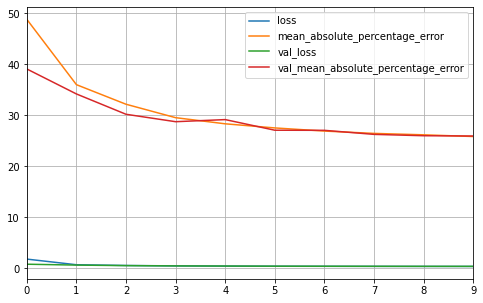

In [30]:
pd.DataFrame(history.history).plot(figsize=(8,5))
# plt.gca().set_ylim(0,1)
plt.grid(True)
plt.show()

# Predict

In [0]:
y_pred = model.predict(X_test_std)

# Evaluate

In [33]:
test_loss, test_acc = model.evaluate(X_test_std, y_test)

6192/6192 [==============================] - 0s 30us/sample - loss: 0.3882 - mean_absolute_percentage_error: 25.8825
